In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing train and test data
train = pd.read_csv('/Users/Rajesh/Documents/Master Plan/Bike Sharing - Random Forest/train.csv')
test = pd.read_csv('/Users/Rajesh/Documents/Master Plan/Bike Sharing - Random Forest/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
#checking dimensions of data
train.shape

(10886, 12)

In [6]:
test.shape

(6493, 9)

In [7]:
#checking data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# checking for missing values
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba28f38690>,
      dtype=object)

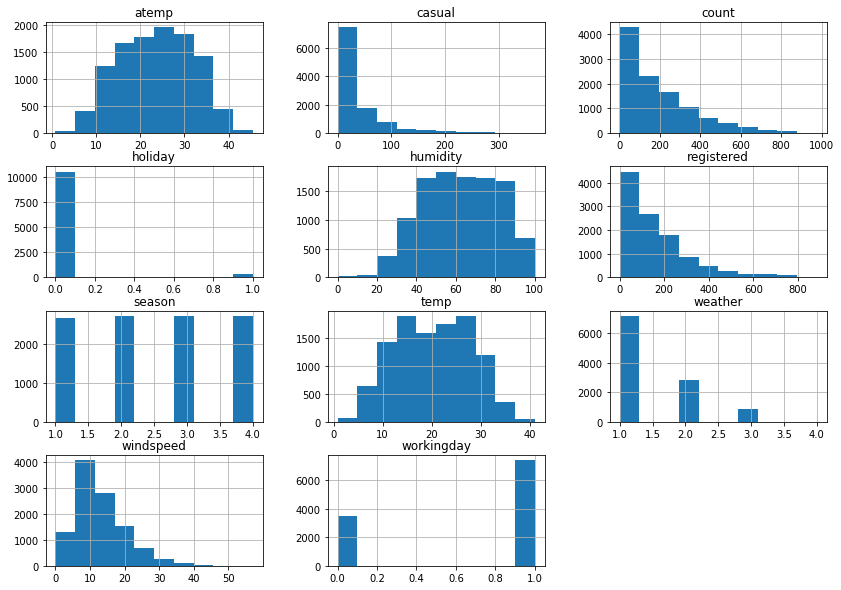

In [9]:
train.hist(figsize=(14,10))

In [10]:
train['workingday'].value_counts(normalize=True)
#68% of hours were working hours

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [11]:
train.where(train['workingday']==1)['count'].sum()/train['count'].sum()

0.6859843987655576

In [12]:
train['season'].value_counts(normalize=True)
#all seasons have a similar attendance

4    0.251148
3    0.251056
2    0.251056
1    0.246739
Name: season, dtype: float64

In [13]:
print(train.where(train['season']==1)['count'].sum()/train['count'].sum())
print(train.where(train['season']==2)['count'].sum()/train['count'].sum())
print(train.where(train['season']==3)['count'].sum()/train['count'].sum())
print(train.where(train['season']==4)['count'].sum()/train['count'].sum())

0.14984492748897613
0.2820852409713658
0.3072018090833939
0.26086802245626417


In [14]:
import matplotlib.pyplot as plt

In [15]:
train['weather'].value_counts(normalize=True)
#most rentals were observed in clear weather with 66%, followed by mist/cloudy weather with 26% and 
#very few rentals took place when there was rain/snow

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

In [16]:
import datetime as dt

In [17]:
#converting datetime column to datetime format
train['datetime'] = train['datetime'].apply(pd.to_datetime)
test['datetime'] = test['datetime'].apply(pd.to_datetime)

In [18]:
#extracting hours from datetime column and creating a separate column
train['hour']=train['datetime'].dt.hour
test['hour']=test['datetime'].dt.hour

In [19]:
#extracting day of week from datetime column and creating a separate column
train['day']=train['datetime'].dt.day_name()
test['day']=test['datetime'].dt.day_name()

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Saturday


In [21]:
#dropping datetime from datasets
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)

In [22]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Saturday


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


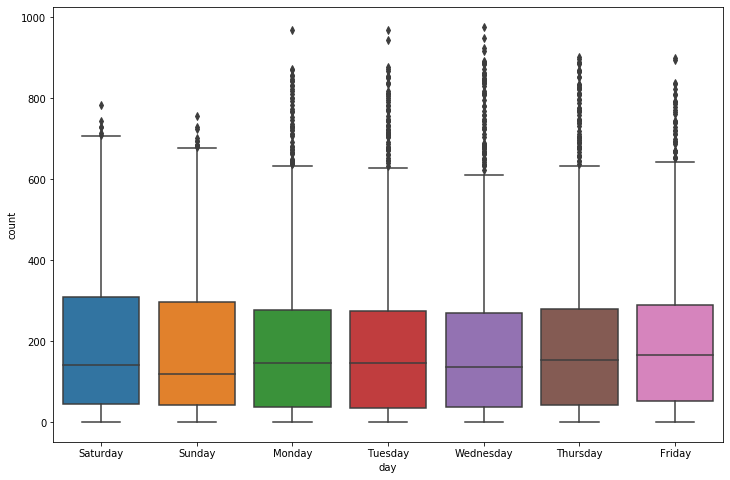

In [23]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.boxplot(train['day'],train['count'])
#highest counts were observed on Saturdays followed by Sundays and Fridays

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


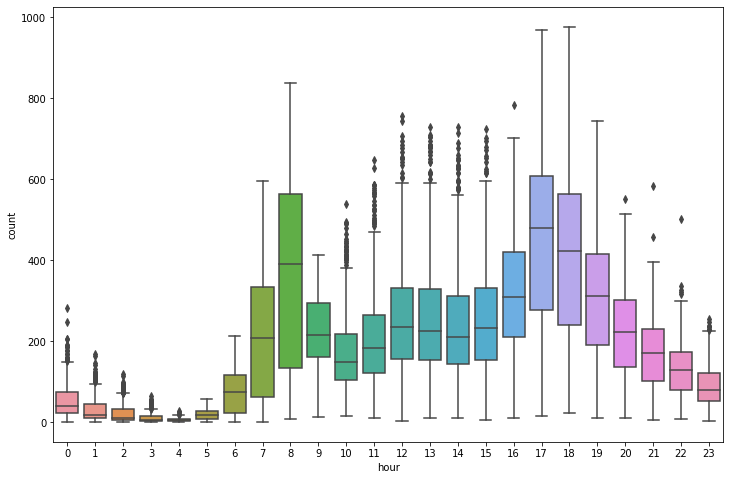

In [24]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.boxplot(train['hour'],train['count'])
#highest count was observed morning 7am & 8am and evening 5pm, 6pm.

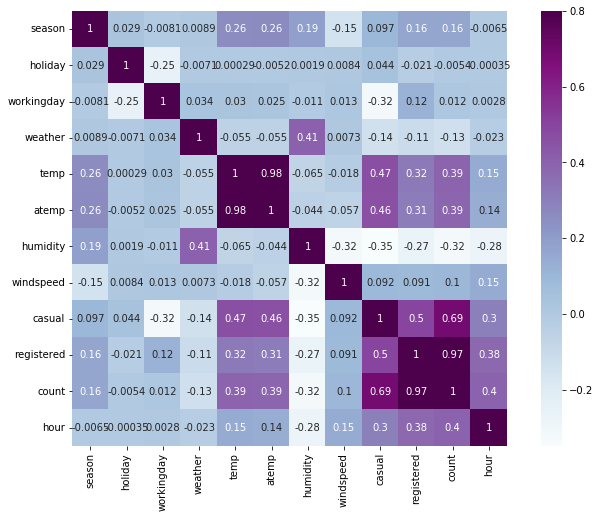

In [25]:
#checking correlation between variables
plt.figure(figsize=(12,8))
matrix=train.corr()
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu',annot=True)

In [26]:
#converting day to numerical dtype
train['day']=train['day'].astype('category')
train['day']=train['day'].cat.codes

test['day']=test['day'].astype('category')
test['day']=test['day'].cat.codes

In [27]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2


In [28]:
#creating bins of hours column
bins = [-1,4,8,12,16,20,23]
labels = [1,2,3,4,5,6]
train['hour_binned']=pd.cut(train['hour'],bins=bins,labels=labels)
test['hour_binned']=pd.cut(test['hour'],bins=bins,labels=labels)

In [29]:
#dropping hour column
train=train.drop('hour',axis=1)
test=test.drop('hour',axis=1)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


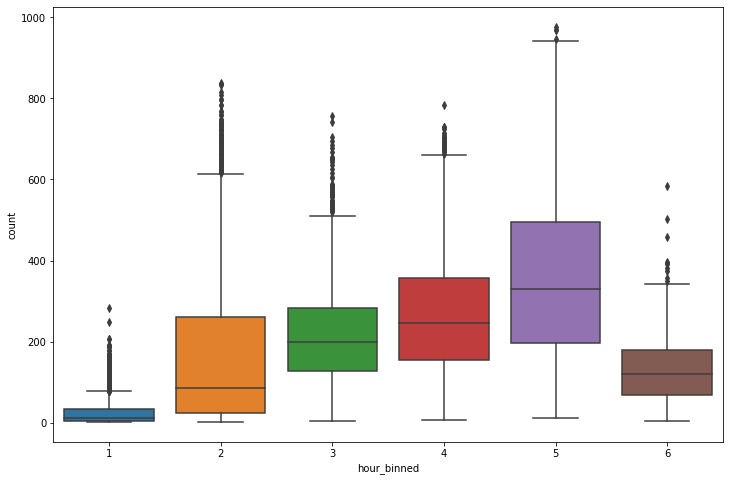

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(train['hour_binned'],train['count'])

In [31]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour_binned
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2,1


In [32]:
#dropping casual and registered columns
train=train.drop(['casual','registered'],axis=1)

In [33]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour_binned
0,1,0,0,1,9.84,14.395,81,0.0,16,2,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2,1


In [34]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour_binned
0,1,0,1,1,10.66,11.365,56,26.0027,4,1
1,1,0,1,1,10.66,13.635,56,0.0000,4,1
2,1,0,1,1,10.66,13.635,56,0.0000,4,1
3,1,0,1,1,10.66,12.880,56,11.0014,4,1
4,1,0,1,1,10.66,12.880,56,11.0014,4,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = train.drop('count',axis=1)
y = train['count']

In [37]:
x_train,x_ev,y_train,y_ev = train_test_split(x,y,test_size=0.3)

In [38]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
pred_ev=model.predict(x_ev)
pred_ev

array([ 17.19333333, 158.98      , 531.975     , ...,   3.97      ,
       177.0825    , 348.79666667])

In [40]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r_square = metrics.r2_score(true,predicted)
    print('Mean Absolute Error (MAE): ',mae)
    print('Mean Squared Error (MSE): ',mse)
    print('Root Mean Squared Error (RMSE):', rmse)
    print('R Square: ',r_square)

In [41]:
print('Train set evaluation: \n')
print_evaluate(y_ev,pred_ev)

Train set evaluation: 

Mean Absolute Error (MAE):  69.61714872568746
Mean Squared Error (MSE):  11505.989867441753
Root Mean Squared Error (RMSE): 107.26597721291571
R Square:  0.6505380609327509


In [42]:
#predicted count for test data
test['count']=model.predict(test)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour_binned,count
0,1,0,1,1,10.66,11.365,56,26.0027,4,1,7.050000
1,1,0,1,1,10.66,13.635,56,0.0000,4,1,7.670000
2,1,0,1,1,10.66,13.635,56,0.0000,4,1,7.670000
3,1,0,1,1,10.66,12.880,56,11.0014,4,1,7.311667
4,1,0,1,1,10.66,12.880,56,11.0014,4,1,7.311667


In [43]:
#rounding off count to integer values
test['count']=round(test['count'],0)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour_binned,count
0,1,0,1,1,10.66,11.365,56,26.0027,4,1,7.0
1,1,0,1,1,10.66,13.635,56,0.0000,4,1,8.0
2,1,0,1,1,10.66,13.635,56,0.0000,4,1,8.0
3,1,0,1,1,10.66,12.880,56,11.0014,4,1,7.0
4,1,0,1,1,10.66,12.880,56,11.0014,4,1,7.0
